<a href="https://colab.research.google.com/github/FSMahi/fashion-mnist-classification/blob/main/Image_Classification_with_NN_vs_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, MaxPooling2D, Conv2D
from IPython.display import SVG

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# 📦 2. Load and Preprocess Dataset

In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# Flatten images
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Add label column at the beginning
train_data = np.column_stack((y_train, x_train_flat))
test_data = np.column_stack((y_test, x_test_flat))


# 3. Convert to Pandas DataFrame

In [ ]:
# Create column names
columns = ['label'] + [f'pixel{i}' for i in range(784)]

# Create DataFrames
df_train = pd.DataFrame(train_data, columns=columns)
df_test = pd.DataFrame(test_data, columns=columns)


In [ ]:
#Save to CSV
df_train.to_csv('fashion_mnist_train.csv', index=False)
df_test.to_csv('fashion_mnist_test.csv', index=False)

In [ ]:
train_file = "fashion_mnist_train.csv"
test_file  = "fashion_mnist_test.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [ ]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,66,54,50,5,0,1,0,0,0,0


# Data Exploration

In [ ]:
print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


# Class Distribution

In [ ]:
# Create a dictionary for each type of label
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(train_data)

Ankle Boot          :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Dress               :   6000 or 10.0%
Pullover            :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Trouser             :   6000 or 10.0%
Shirt               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Bag                 :   6000 or 10.0%


The classes are equaly distributed in the train set (10% each). Let's check the same for the test set.
Let's also plot the class distribution.

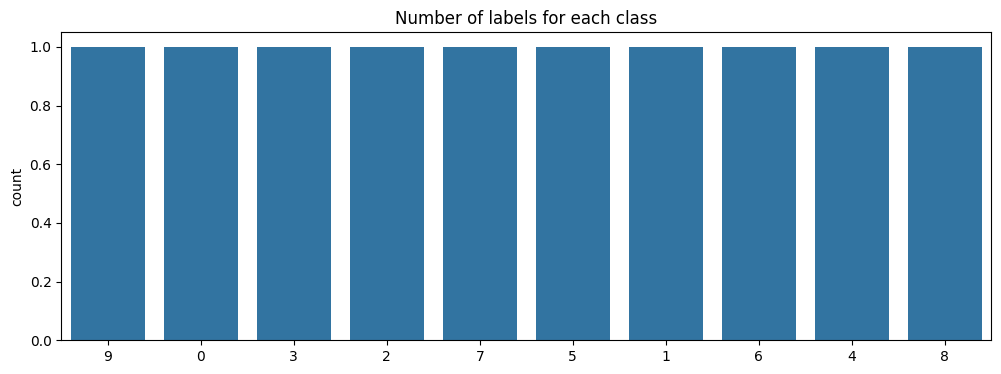

In [ ]:
def plot_label_per_class(data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(data.label, order = data["label"].value_counts().index)
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
    plt.show()

plot_label_per_class(train_data)

# Test data class distribution

In [ ]:
get_classes_distribution(test_data)

Ankle Boot          :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
T-shirt/top         :   1000 or 10.0%


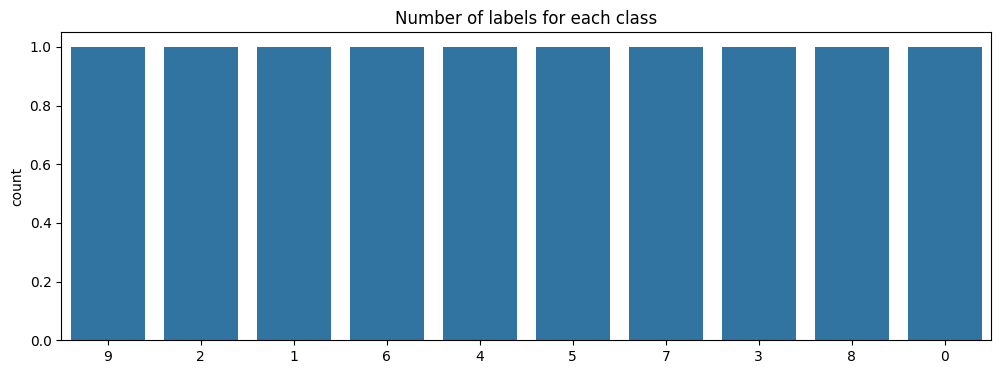

In [ ]:
plot_label_per_class(test_data)

# Sample images

## Train set images
Let's plot some samples for the images.
We add labels to the train set images, with the corresponding fashion item category.

In [ ]:
IMG_ROWS = 28
IMG_COLS = 28

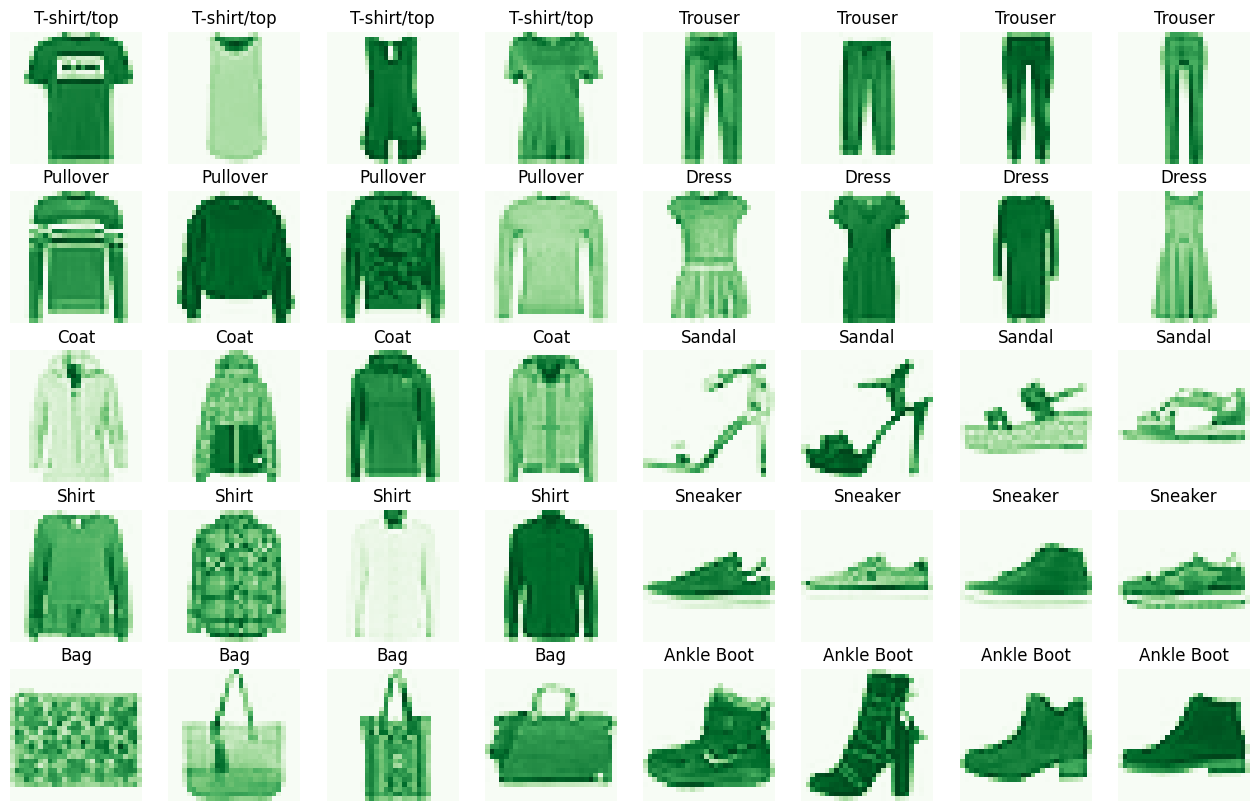

In [ ]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()

plot_sample_images(train_sample_images,train_sample_labels, "Greens")

## Test set images
Let's plot now a selection of the test set images.
Labels are as well added (they are known).

Total number of sample images to plot:  40


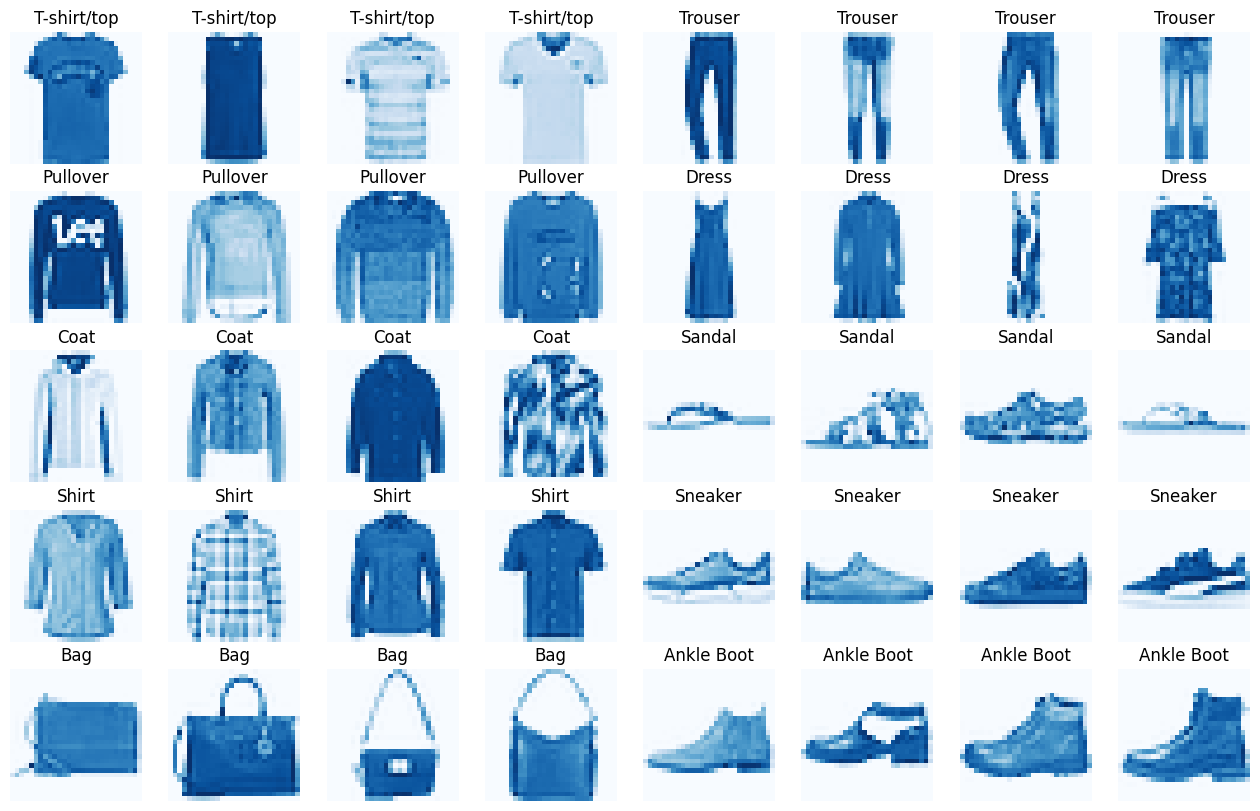

In [ ]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels)

# Prepare the model
## Data preprocessing
First we will do a data preprocessing to prepare for the model.

We reshape the columns from (784) to (28,28,1). We also save label (target) feature as a separate vector.

In [ ]:
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018

In [ ]:
def data_preprocessing(raw_df):
    out_y = to_categorical(raw_df.label, NUM_CLASSES)
    num_images = raw_df.shape[0]
    x_as_array = raw_df.values[:, 1:]  # Exclude 'label' column
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_shaped_array / 255.0  # Normalize
    return out_x, out_y


In [ ]:
# prepare the data
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

# Split train in train and validation set
We further split the train set in train and validation set. The validation set will be 20% from the original train set, therefore the split will be train/validation of 0.8/0.2.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [ ]:
X_train.shape

(48000, 28, 28, 1)

In [ ]:
X_val.shape

(12000, 28, 28, 1)

In [ ]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


In [ ]:
X_train.shape

(48000, 28, 28, 1)

In [ ]:
def plot_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(ydf[0], order = np.arange(0,10))
    g.set_title("Number of items for each class")
    g.set_xlabel("Category")

    for p, label in zip(g.patches, np.arange(0,10)):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))

    plt.show()

def get_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    # Get the count for each label
    label_counts = ydf[0].value_counts()

    # Get total number of samples
    total_samples = len(yd)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))


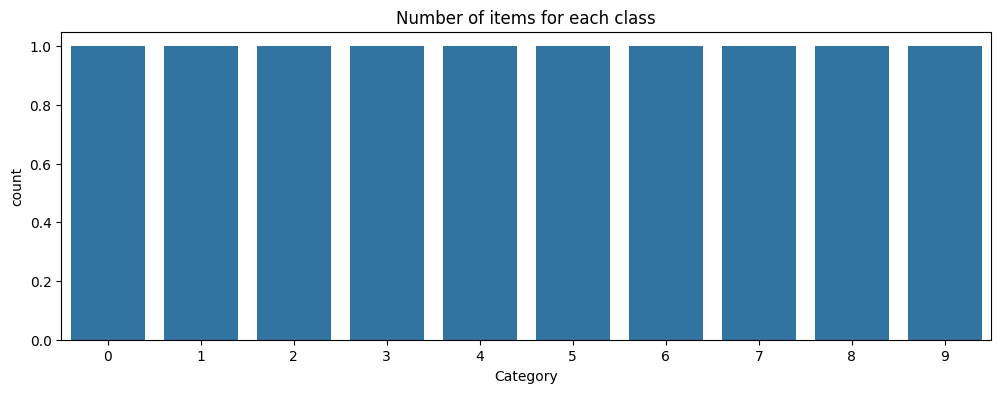

Ankle Boot          :   4832 or 10.066666666666666%
Dress               :   4829 or 10.060416666666667%
Pullover            :   4822 or 10.045833333333333%
Bag                 :   4812 or 10.025%
Sandal              :   4806 or 10.012500000000001%
Sneaker             :   4805 or 10.010416666666666%
Shirt               :   4802 or 10.004166666666666%
T-shirt/top         :   4792 or 9.983333333333333%
Trouser             :   4770 or 9.9375%
Coat                :   4730 or 9.854166666666666%


In [ ]:
plot_count_per_class(np.argmax(y_train,axis=1))
get_count_per_class(np.argmax(y_train,axis=1))

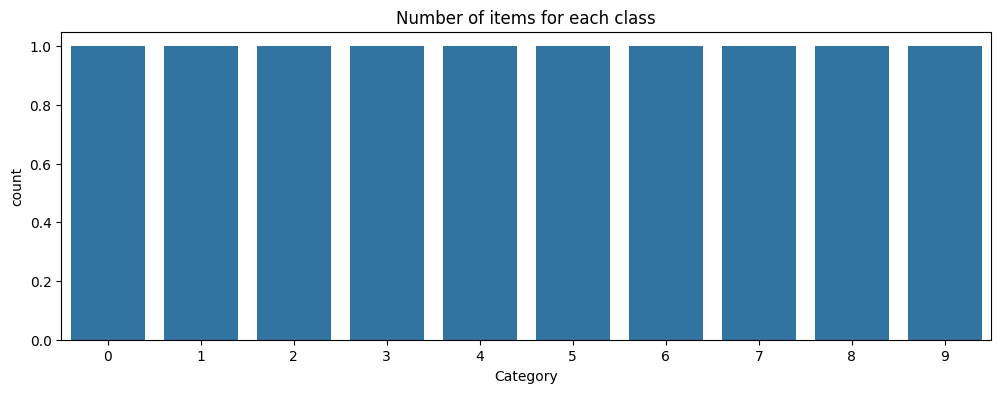

Coat                :   1270 or 10.583333333333334%
Trouser             :   1230 or 10.25%
T-shirt/top         :   1208 or 10.066666666666666%
Shirt               :   1198 or 9.983333333333333%
Sneaker             :   1195 or 9.958333333333332%
Sandal              :   1194 or 9.950000000000001%
Bag                 :   1188 or 9.9%
Pullover            :   1178 or 9.816666666666666%
Dress               :   1171 or 9.758333333333333%
Ankle Boot          :   1168 or 9.733333333333333%


In [ ]:
plot_count_per_class(np.argmax(y_val,axis=1))
get_count_per_class(np.argmax(y_val,axis=1))

# Train the model

## Build and Train NN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
nn_model = Sequential()

nn_model.add(Dense(256, activation='relu', input_shape=(784,)))
nn_model.add(BatchNormalization())
nn_model.add(Dropout(0.2))

nn_model.add(Dense(128, activation='relu'))
nn_model.add(BatchNormalization())
nn_model.add(Dropout(0.2))

nn_model.add(Dense(64, activation='relu'))
nn_model.add(BatchNormalization())
nn_model.add(Dropout(0.2))

nn_model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
nn_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,554 (955.29 KB)

 Trainable params: 243,658 (951.79 KB)

 Non-trainable params: 896 (3.50 KB)


    # First hidden layer: 256 neurons with ReLU activation
    # Input shape is 784 (flattened 28x28 image)
    # Batch Normalization improves training stability and convergence speed
    BatchNormalization(),
    # Dropout randomly disables 30% of neurons to prevent overfitting
    Dropout(0.3),

    # Second hidden layer: 128 neurons with ReLU activation
    BatchNormalization(),
    Dropout(0.3),

    # Third hidden layer: 64 neurons with ReLU activation
    BatchNormalization(),
    # No dropout here to retain useful information

    # Output layer: 10 neurons (digits 0–9), softmax converts to probability distribution

In [ ]:
# Define the optimizer
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

In [ ]:
nn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
batch_size = 64
num_classes = 10
epochs = 20

In [ ]:
# Flatten the input for NN model
X_train_flat = X_train.reshape(-1, 28*28)
X_val_flat = X_val.reshape(-1, 28*28)


In [ ]:
history = nn_model.fit(
    X_train_flat, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_val_flat, y_val),

)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.7322 - loss: 0.7832 - val_accuracy: 0.8188 - val_loss: 0.4953
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8321 - loss: 0.4609 - val_accuracy: 0.8507 - val_loss: 0.4151
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8446 - loss: 0.4263 - val_accuracy: 0.8565 - val_loss: 0.4017
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8521 - loss: 0.4076 - val_accuracy: 0.8648 - val_loss: 0.3669
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8571 - loss: 0.3964 - val_accuracy: 0.8687 - val_loss: 0.3635
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8650 - loss: 0.3779 - val_accuracy: 0.8689 - val_loss: 0.3519
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8643 - loss: 0.3677 - val_accuracy: 0.8659 - val_loss: 0.3544
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8656 - loss: 0.3647 - val_accu

# 📈 5. Evaluate Model

In [ ]:
# Evaluate NN
nn_loss, nn_accuracy = nn_model.evaluate(x_test_flat, y_test)
print(f"NN Test Accuracy: {nn_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8311 - loss: 21.4640
NN Test Accuracy: 82.96%


In [ ]:
def show_predictions(model, images, labels, reshape=False, title="", num_images=5):
    preds = model.predict(images)
    preds_labels = np.argmax(preds, axis=1)
    true_labels = np.argmax(labels, axis=1) if labels.ndim > 1 else labels

    plt.figure(figsize=(3 * num_images, 4))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        img = images[i].reshape(28, 28) if reshape else images[i].squeeze()
        plt.imshow(img, cmap='gray')

        pred_idx = preds_labels[i]
        true_idx = true_labels[i]


        title_text = f"Pred: {class_names[pred_idx]}\nTrue: {class_names[true_idx]}"
        plt.title(title_text, fontsize=9)
        plt.axis('off')

    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


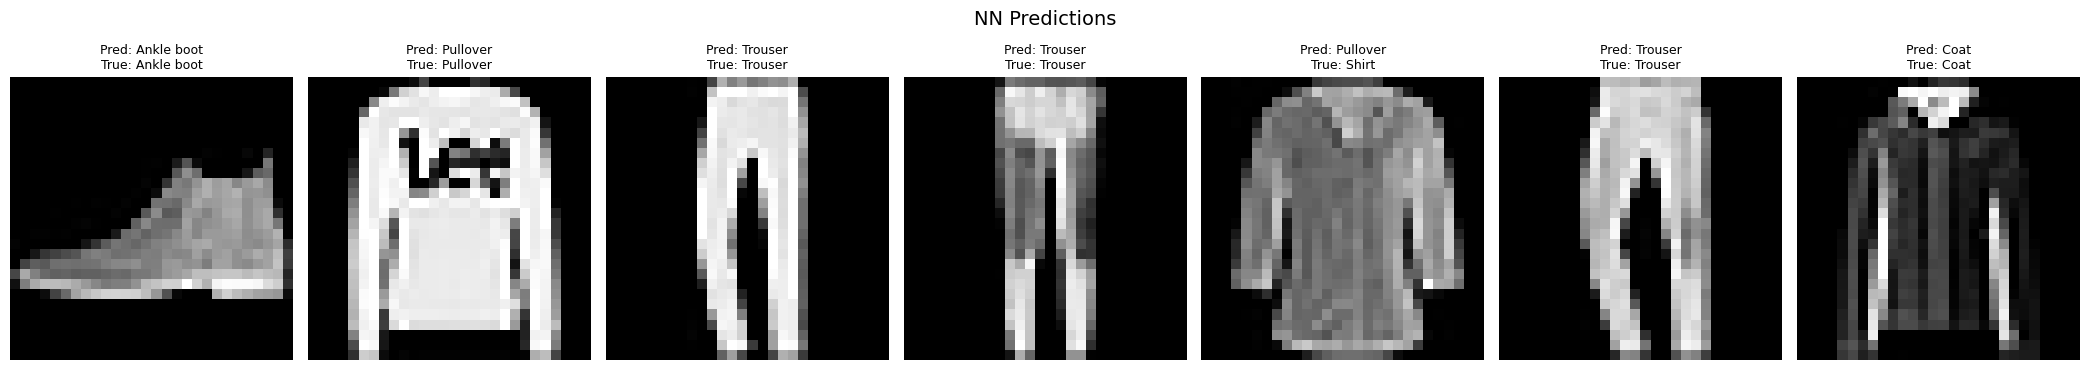

In [ ]:
show_predictions(nn_model, x_test_flat[:15], y_test[:15], reshape=True, title="NN Predictions", num_images=7)


In [ ]:
score = nn_model.evaluate(x_test_flat, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 22.688840866088867
Test accuracy: 0.8295999765396118


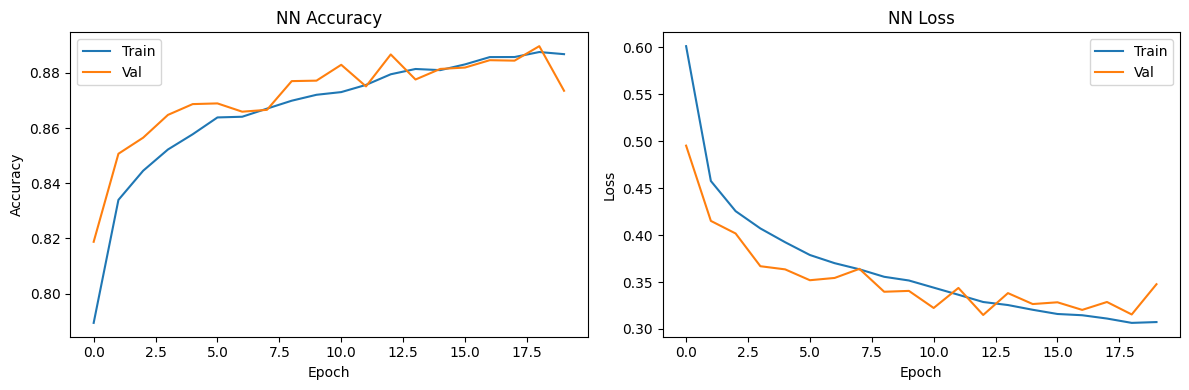

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title(f'{title} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history, "NN")


# CNN

In [ ]:

#Creating an object of Sequential class
cnn_model = Sequential()
# Add convolution 2D
cnn_model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
cnn_model.add(MaxPooling2D((2, 2)))

# Add convolution 2D
cnn_model.add(Conv2D(64,
                 kernel_size=(3, 3),
                 activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))


cnn_model.add(Conv2D(128, (3, 3), activation='relu'))


cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(NUM_CLASSES, activation='softmax'))




In [ ]:
cnn_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model.compile(loss= 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history_cnn = cnn_model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 60ms/step - accuracy: 0.7592 - loss: 0.6652 - val_accuracy: 0.8659 - val_loss: 0.3781
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 64ms/step - accuracy: 0.8809 - loss: 0.3253 - val_accuracy: 0.8949 - val_loss: 0.2915
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.9041 - loss: 0.2605 - val_accuracy: 0.9011 - val_loss: 0.2765
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 58ms/step - accuracy: 0.9171 - loss: 0.2265 - val_accuracy: 0.9101 - val_loss: 0.2515
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 62ms/step - accuracy: 0.9263 - loss: 0.1960 - val_accuracy: 0.9110 - val_loss: 0.2446
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 58ms/step - accuracy: 0.9369 - loss: 0.1724 - val_accuracy: 0.9148 - val_loss: 0.2475
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.9456 - loss: 0.1475 - val_accuracy: 0.9087 - val_loss: 0.2755
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.9526 - loss: 0.1292 - 

In [ ]:
# Evaluate CNN
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"CNN Test Accuracy: {cnn_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9057 - loss: 0.4779
CNN Test Accuracy: 90.84%


In [ ]:
#Model evaluation
score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4527513086795807
Test accuracy: 0.9083999991416931


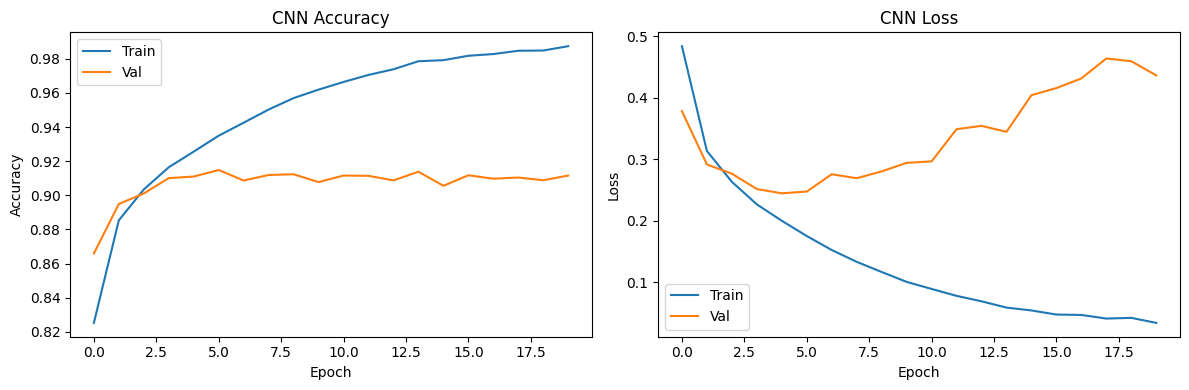

In [ ]:
plot_history(history_cnn, "CNN")

here we can see the model is overfitted, so to overcome this issue we add dropout and batchnormalization layer after the convolutional layer

In [ ]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(64,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,442 (947.04 KB)

 Trainable params: 241,994 (945.29 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
train_model = model.fit(X_train, y_train,
                  batch_size=64,
                  epochs=10,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 62s 78ms/step - accuracy: 0.7140 - loss: 0.8435 - val_accuracy: 0.8619 - val_loss: 0.3707
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 76ms/step - accuracy: 0.8421 - loss: 0.4237 - val_accuracy: 0.8869 - val_loss: 0.3091
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.8657 - loss: 0.3640 - val_accuracy: 0.8967 - val_loss: 0.2849
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 76ms/step - accuracy: 0.8788 - loss: 0.3270 - val_accuracy: 0.9010 - val_loss: 0.2659
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 76ms/step - accuracy: 0.8838 - loss: 0.3156 - val_accuracy: 0.8997 - val_loss: 0.2868
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.8860 - loss: 0.3065 - val_accuracy: 0.9053 - val_loss: 0.2688
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.8928 - loss: 0.2872 - val_accuracy: 0.9062 - val_loss: 0.2568
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.8965 - loss: 0.2789 - 

In [ ]:
# Evaluate CNN
model_loss, model_accuracy = model.evaluate(X_test, y_test)
print(f"CNN Test Accuracy: {model_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9111 - loss: 0.2519
CNN Test Accuracy: 91.05%


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25115248560905457
Test accuracy: 0.9104999899864197


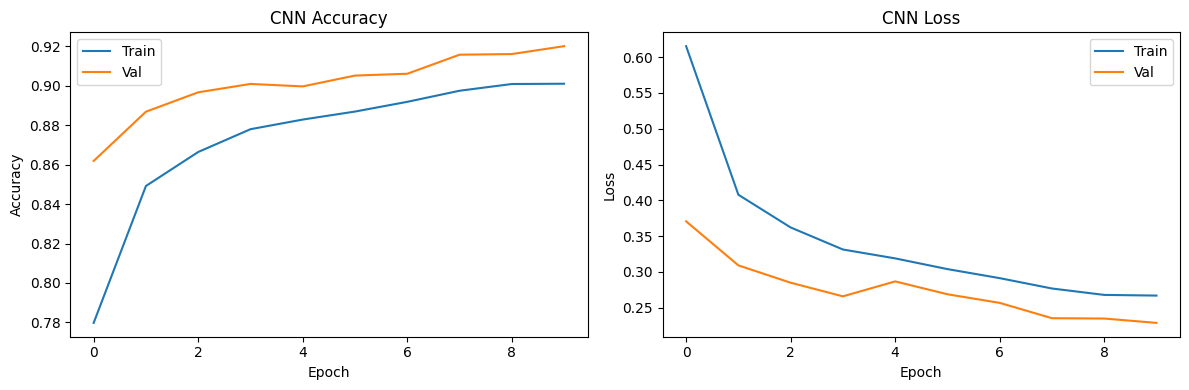

In [ ]:
plot_history(train_model, "CNN")

In [ ]:
#get the predictions for the test data
predicted_classes = model.predict(X_test)
#get the indices to be plotted
y_true = test_data.iloc[:, 0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [ ]:
p = np.argmax(predicted_classes, axis=1)
y = y_true
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [ ]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9105
Incorrect predicted classes: 895


In [ ]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predicted_classes, axis=1)
print(classification_report(y_true, predicted_labels, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.86      0.87      0.86      1000
    Class 1 (Trouser) :       0.99      0.98      0.99      1000
   Class 2 (Pullover) :       0.87      0.86      0.87      1000
      Class 3 (Dress) :       0.89      0.93      0.91      1000
       Class 4 (Coat) :       0.84      0.88      0.86      1000
     Class 5 (Sandal) :       0.98      0.98      0.98      1000
      Class 6 (Shirt) :       0.77      0.70      0.73      1000
    Class 7 (Sneaker) :       0.94      0.98      0.96      1000
        Class 8 (Bag) :       0.98      0.97      0.98      1000
 Class 9 (Ankle Boot) :       0.98      0.95      0.97      1000

               accuracy                           0.91     10000
              macro avg       0.91      0.91      0.91     10000
           weighted avg       0.91      0.91      0.91     10000



In [ ]:
confusion_mtx=classification_report(y_true, predicted_labels, target_names=target_names)

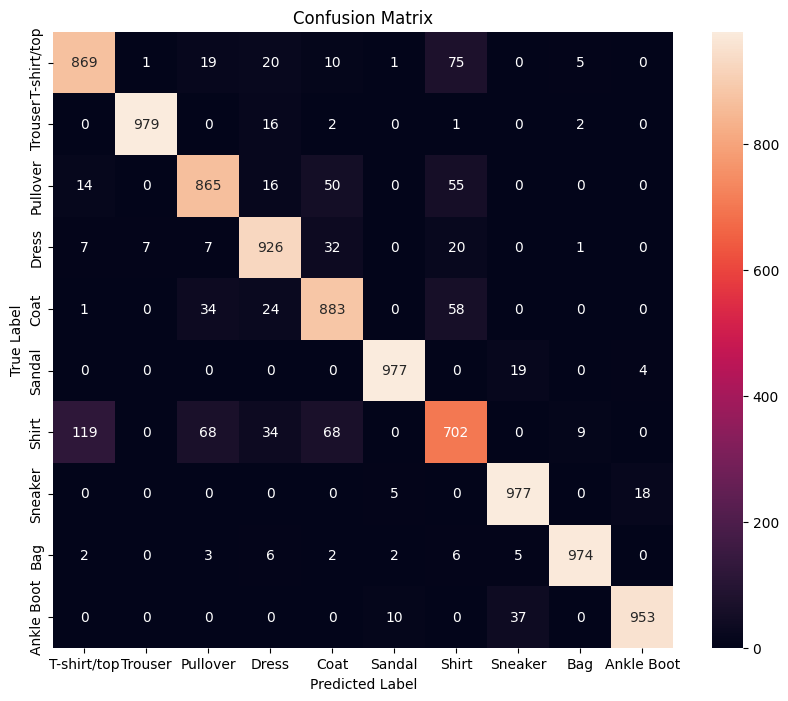

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_true, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g',  xticklabels=labels.values(), yticklabels=labels.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot a few correct predicted samples and a few misclassified samples.

In [ ]:
# Show some wrong results, and the difference between the predicted label and the real labels
errors = (predicted_labels - y_true != 0)

Y_pred_classes_errors = predicted_labels[errors]
Y_pred_errors = model.predict(X_test)[errors] # Assuming Y_pred was intended to be the raw predictions
Y_true_errors = y_true[errors]
X_val_errors = X_test[errors] # Assuming X_val_errors was meant to be the test images with errors

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [ ]:
def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)), cmap='gray') # Assuming grayscale for Fashion MNIST
            # Use standard indexing for the numpy array (pred_errors) and .iloc for the pandas Series (obs_errors)
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(labels[pred_errors[error].item()],labels[obs_errors.iloc[error].item()]))
            ax[row,col].axis('off')
            n += 1
    plt.tight_layout()
    plt.show()

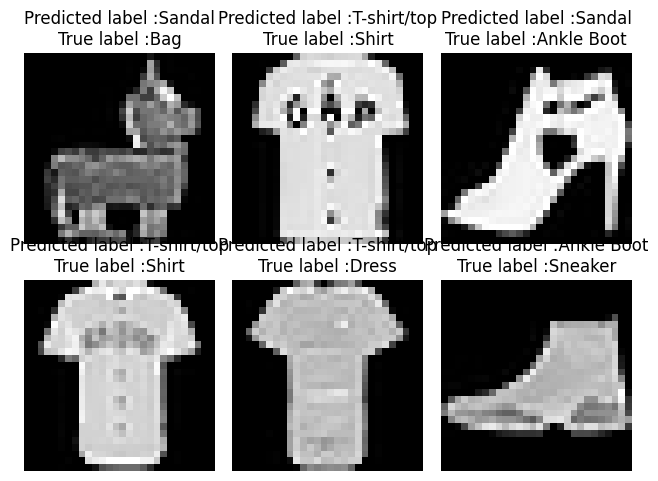

In [ ]:
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
# Need to use iloc here because Y_true_errors retains original index
true_prob_errors = Y_pred_errors[np.arange(len(Y_true_errors)), Y_true_errors.values]


# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
# Pass the filtered data directly
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [ ]:
#get the predictions for the test data
Y_pred = model.predict(x_test)
#get the indices to be plotted
y_true = np.argmax(y_test,axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [ ]:
correct = np.nonzero(p==y_true)[0]
misclassified = np.nonzero(p!=y_true)[0]

In [ ]:
print("Correct predicted classes:",correct.shape[0])
print("Misclassified predicted classes:",misclassified.shape[0])

Correct predicted classes: 9105
Misclassified predicted classes: 895


**Displaying some Correct predicted samples**

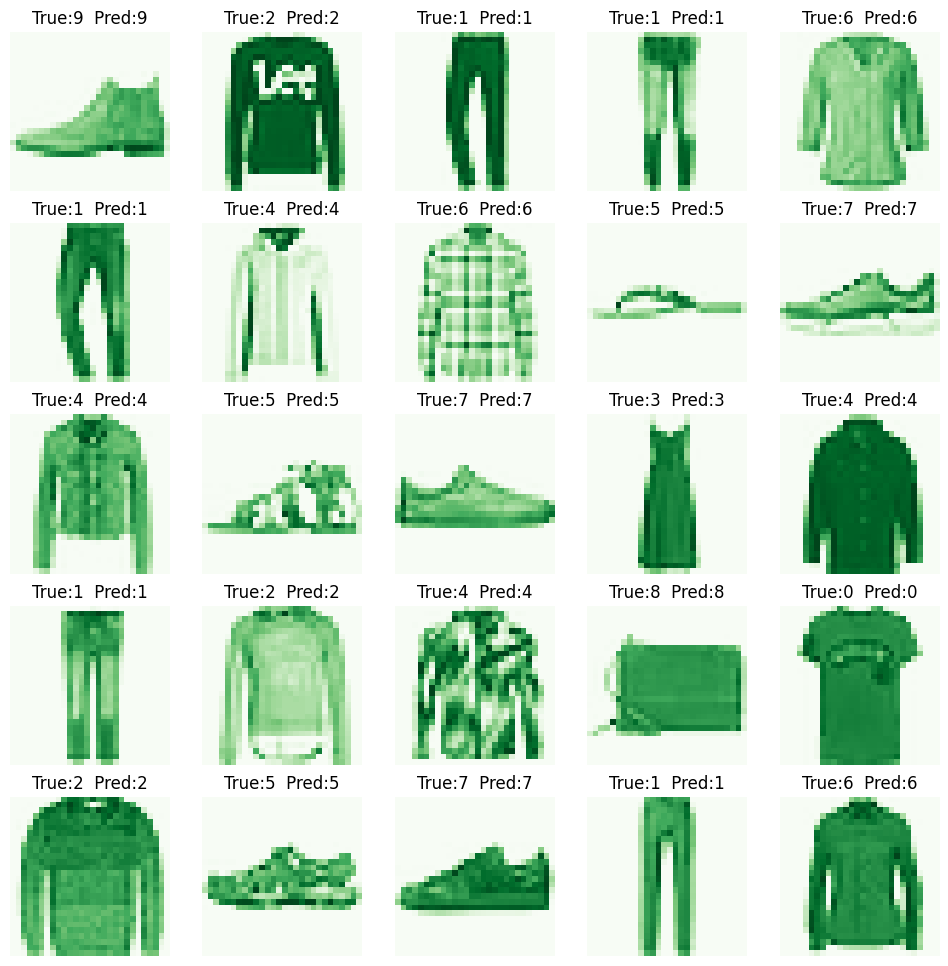

In [ ]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,5, figsize=(12,12))

    for i, indx in enumerate(data_index[:25]):
        ax[i//5, i%5].imshow(x_test[indx].reshape(28,28), cmap=cmap)
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title("True:{}  Pred:{}".format(y_true[indx],p[indx]))
    plt.show()

plot_images(correct, "Greens")

**Displaying some Misclassified predicted samples**

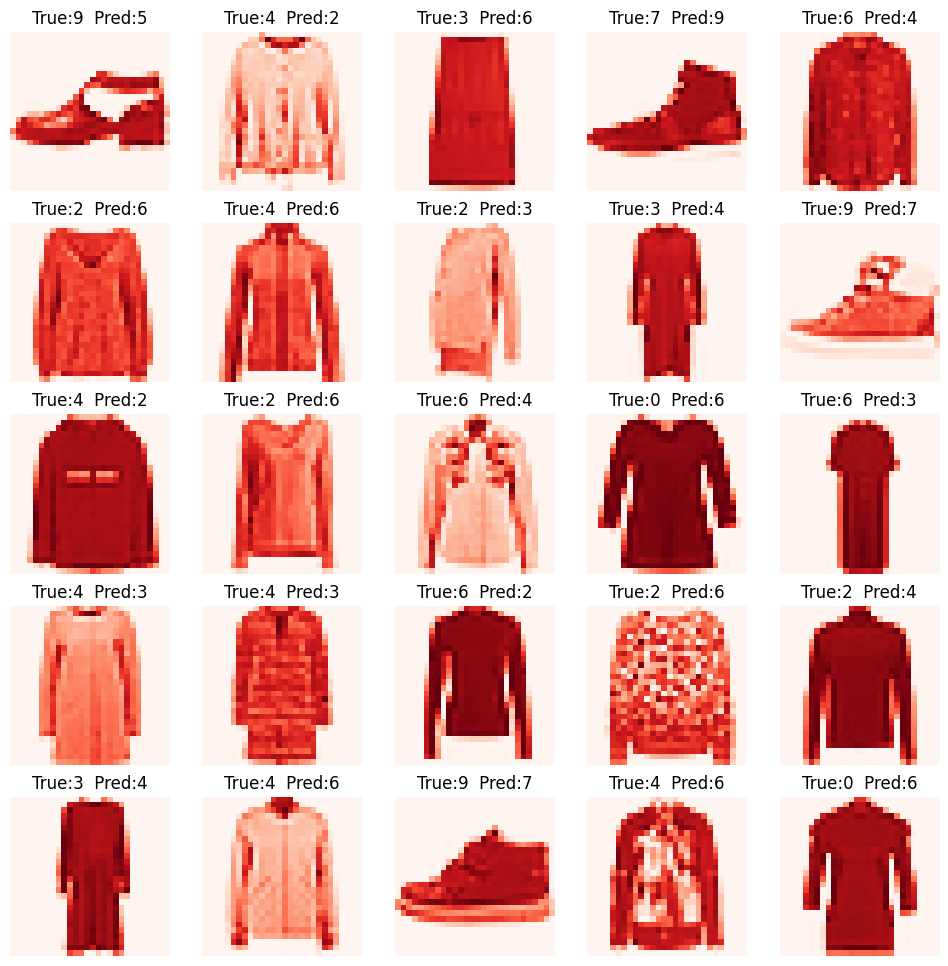

In [ ]:
plot_images(misclassified, "Reds")